# Reference

https://www.kaggle.com/gargmanish/how-to-handle-imbalance-data-study-in-detail

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # to split the data
from sklearn.model_selection import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_score, precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
### read data into data_df
data_df = pd.read_csv('data\creditcard.csv')

In [3]:
data_df.head()

### data has been scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis

### Basic info of data_df

In [4]:
data_df.info()

### all columns are numbers
### total 284807 rows
### total 31 columns: 1 Time, 28 Variables, 1 Amount, 1 Class (Y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Univariate Analysis

Text(0, 0.5, 'V1')

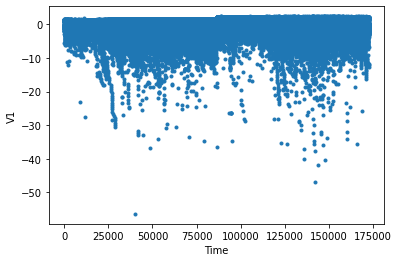

In [6]:
### scatter plot between 2 variables
x = 'Time'
y = 'V1'

plt.plot(data_df[x], data_df[y], '.')
plt.xlabel(x)
plt.ylabel(y)

<AxesSubplot:>

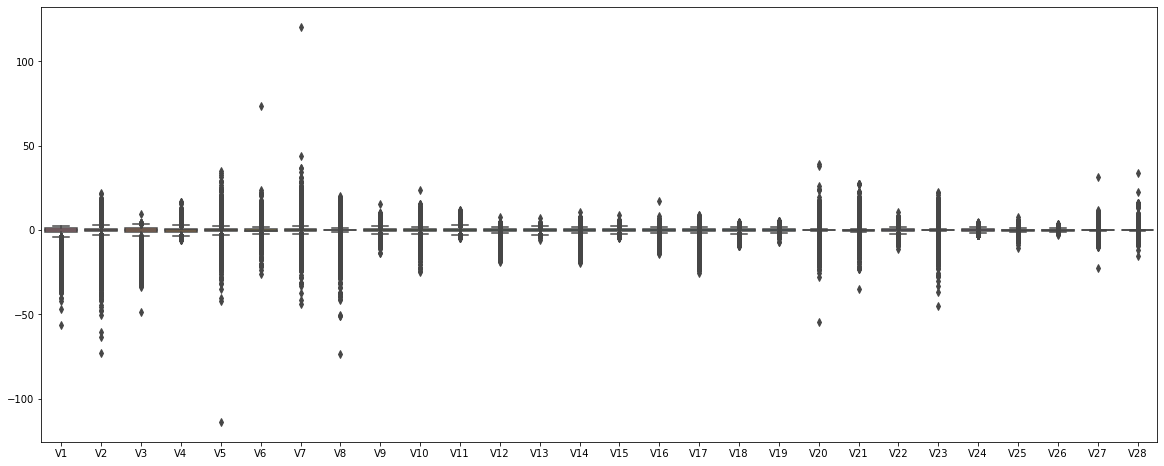

In [7]:
### Boxplot for multiple cols

fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=data_df.drop(['Time','Amount','Class'], axis=1))

### most of the variables are left-skewed / right-skewed, with outliers

<AxesSubplot:>

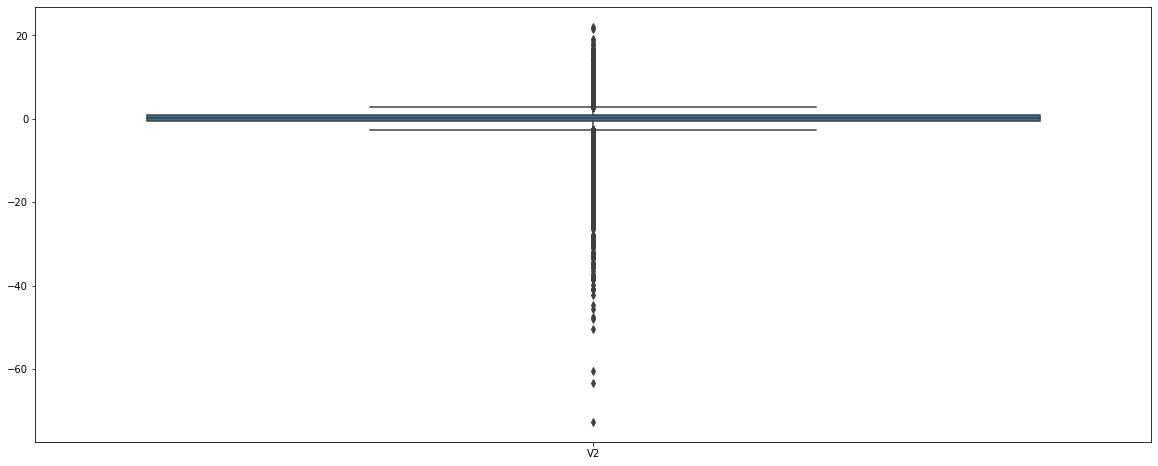

In [8]:
### Boxplot for single variable
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=data_df[['V2']])

<AxesSubplot:xlabel='V1', ylabel='Density'>

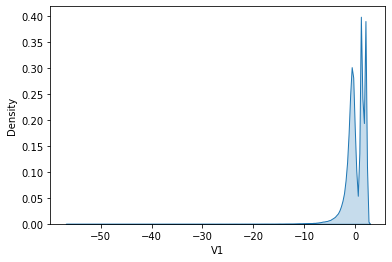

In [9]:
### Distribution plot for single variable
col = 'V1'
sns.kdeplot(data_df[col], shade=True)

### Outliers removal

In [10]:
### Calculating Q1, Q3 and IQR
Q1 = data_df.quantile(0.01)
Q3 = data_df.quantile(0.99)
IQR = Q3 - Q1
idx = ~((data_df < (Q1 - 1.5 * IQR)) | (data_df > (Q3 + 1.5 * IQR))).any(axis=1)

In [11]:
print('data_df before removing outliers')
print(data_df['Class'].value_counts())
print()

print('data_df after removing outliers')
print(data_df[idx]['Class'].value_counts())
print()

print('data_df with outliers')
print(data_df[~idx]['Class'].value_counts())


### All the Class 1 are in outliers data
### Can use outliers df to do classification?

data_df before removing outliers
0    284315
1       492
Name: Class, dtype: int64

data_df after removing outliers
0    282343
Name: Class, dtype: int64

data_df with outliers
0    1972
1     492
Name: Class, dtype: int64


<AxesSubplot:>

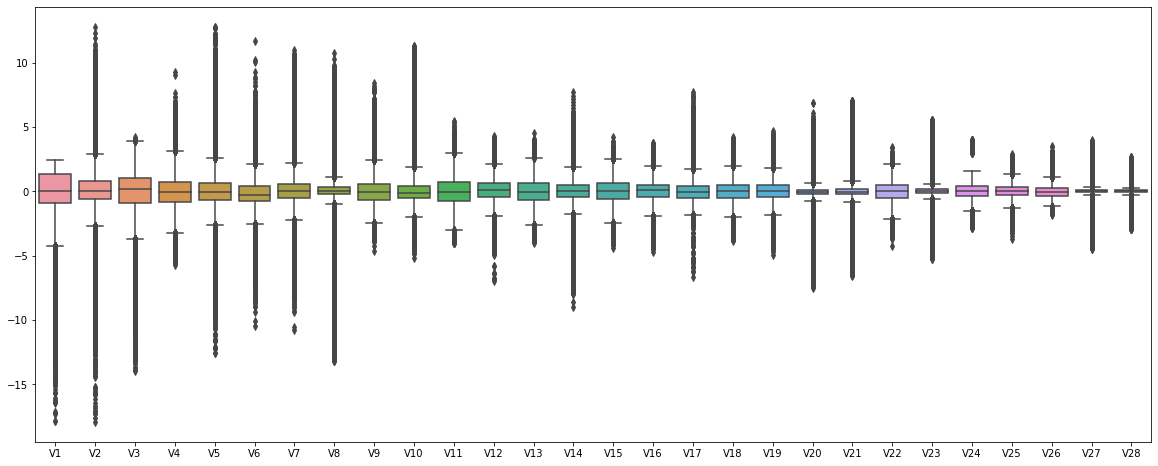

In [12]:
### Boxplot for multiple cols after removing outlier

fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=data_df[idx].drop(['Time','Amount','Class'], axis=1))

### most of the variables are left-skewed / right-skewed, with outliers

<AxesSubplot:xlabel='V1', ylabel='Density'>

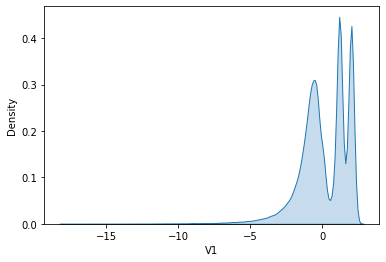

In [13]:
### Distribution plot for single variable
col = 'V1'
sns.kdeplot(data_df[idx][col], shade=True)

### Scatter plot of variables

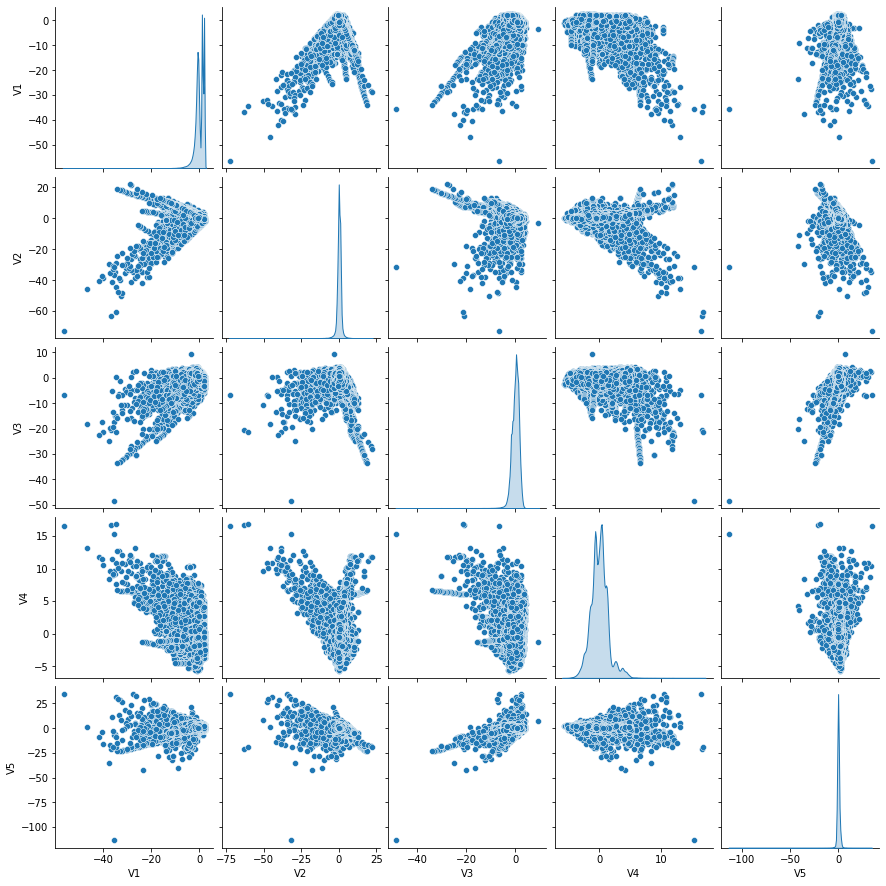

In [14]:
sns.pairplot(data_df[['V1','V2','V3','V4','V5']],diag_kind="kde")

In [15]:
round(data_df.corr(),2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10
V2,-0.01,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.53,0.09
V3,-0.42,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,0.00,...,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.21,-0.19
V4,-0.11,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,...,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.10,0.13
V5,0.17,0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,0.00,...,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09
V6,-0.06,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04
V7,0.08,-0.00,0.00,0.00,-0.00,0.00,0.00,1.00,0.00,0.00,...,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.40,-0.19
V8,-0.04,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02
V9,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10


<AxesSubplot:>

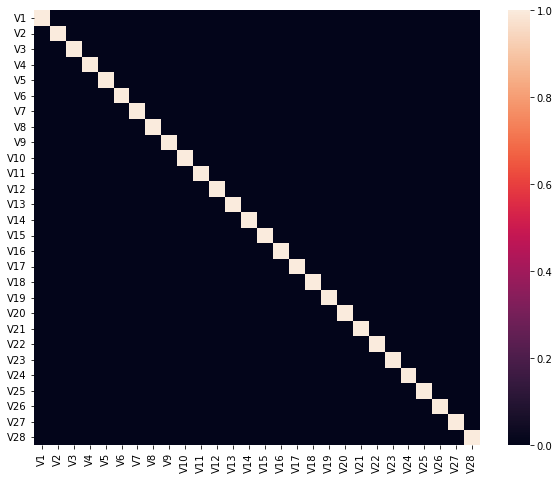

In [16]:
corr = data_df.drop(['Time', 'Amount', 'Class'],axis=1).corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,)

### Correlations between V1 to V28 are close to 0

<AxesSubplot:>

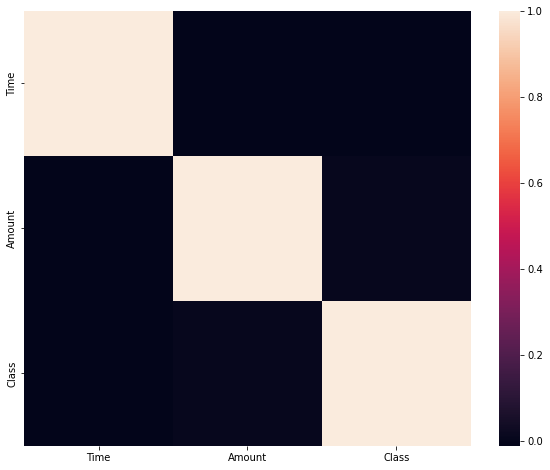

In [17]:
corr = data_df[['Time','Amount','Class']].corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,)

# Investigating y-variable

### Using all data

Percentage of Class 0: 99.83 %
Percentage of Class 1: 0.17 %


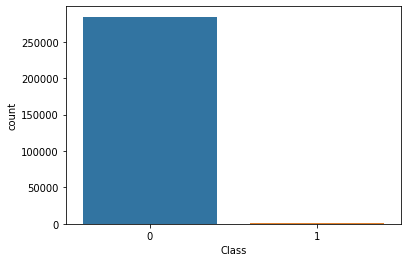

In [18]:
### Investigating imbalance percentage

### class distributions
sns.countplot("Class",data=data_df)

print('Percentage of Class 0: {a} %'.format(a = round(len(data_df[data_df['Class'] == 0])/len(data_df)*100, 2)))
print('Percentage of Class 1: {a} %'.format(a = round(len(data_df[data_df['Class'] == 1])/len(data_df)*100, 2)))
### imbalanced class

In [19]:
Class0_df = data_df[data_df['Class'] == 0]
Class1_df = data_df[data_df['Class'] == 1]

<AxesSubplot:title={'center':'Class 1 - V1'}, ylabel='Frequency'>

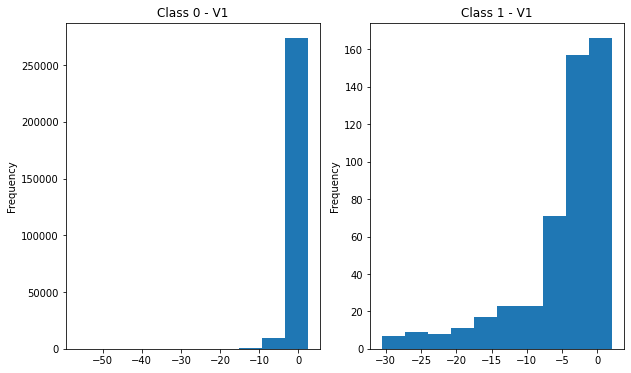

In [20]:
variable = 'V1'

plt.figure(figsize=(10,6))
plt.subplot(121)

Class0_df[variable].plot.hist(title = 'Class 0 - ' + variable)

plt.subplot(122)
Class1_df[variable].plot.hist(title = 'Class 1 - ' + variable)


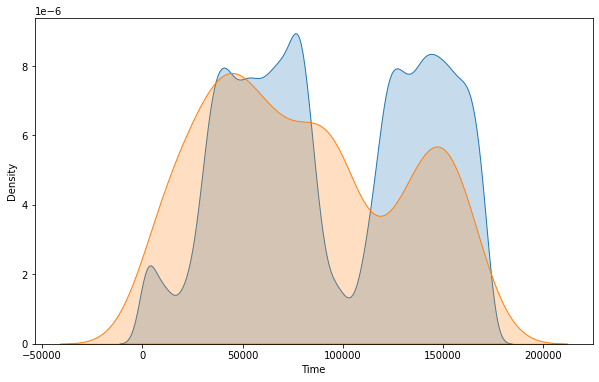

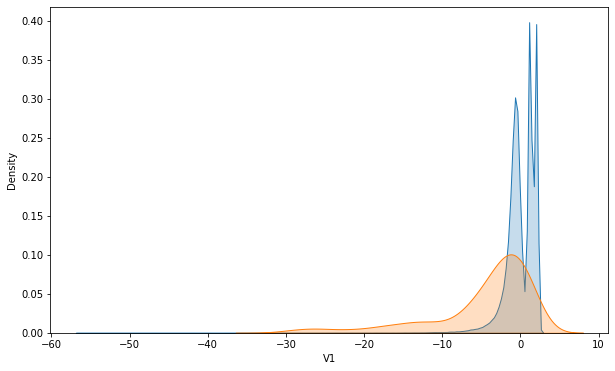

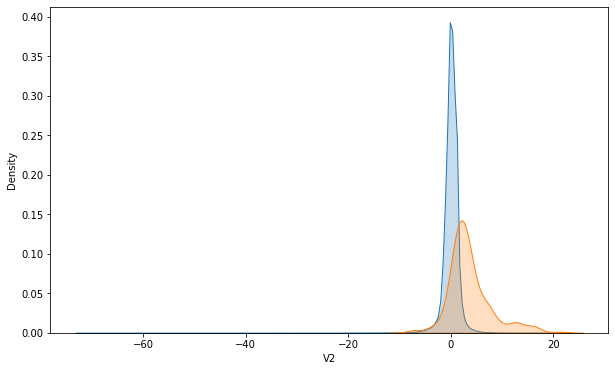

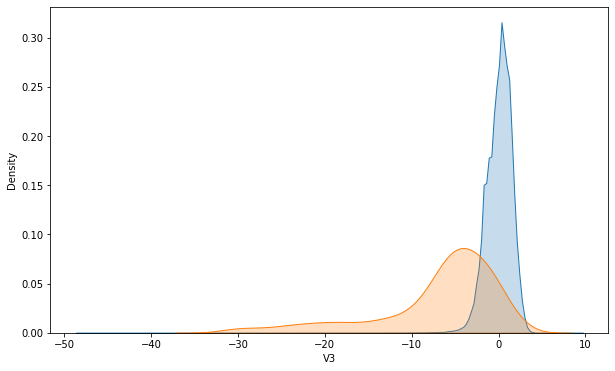

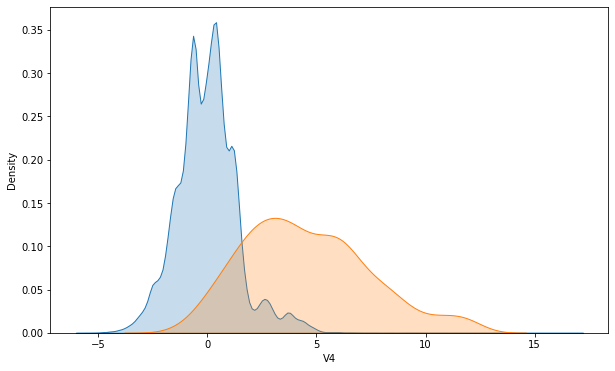

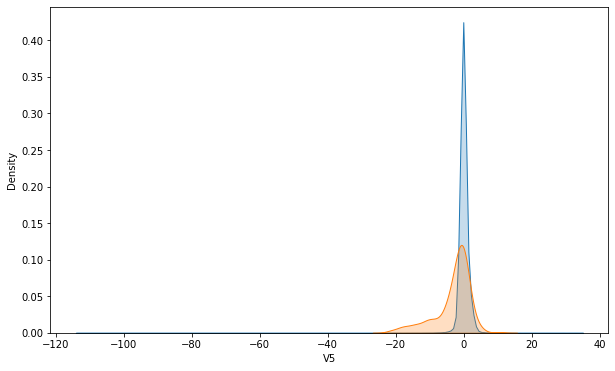

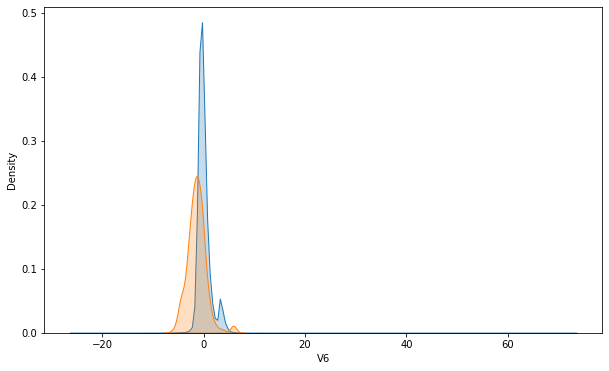

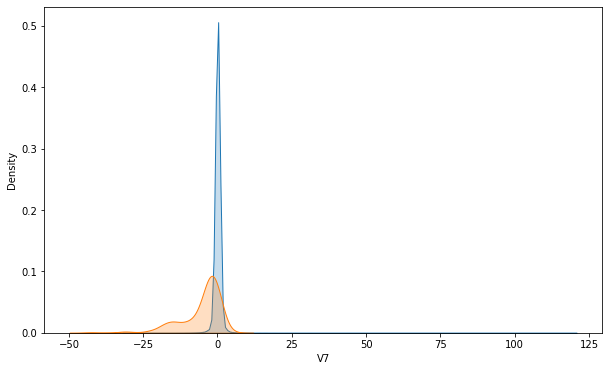

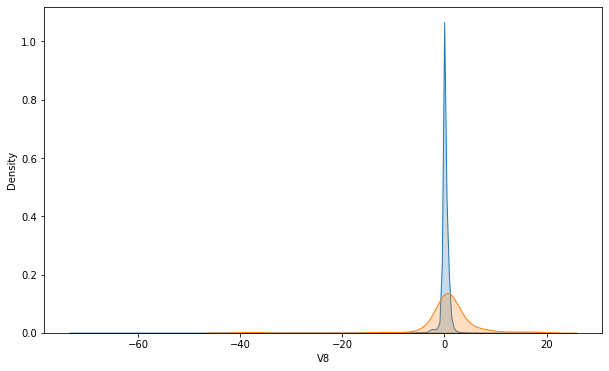

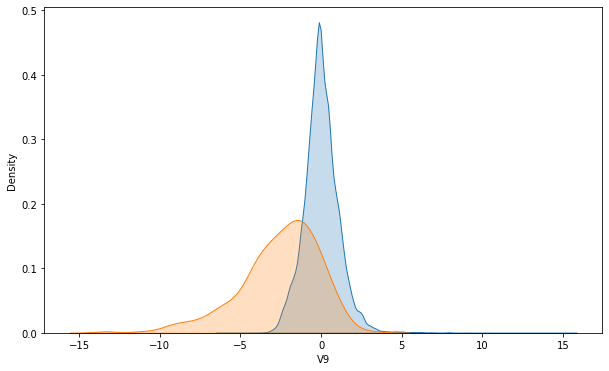

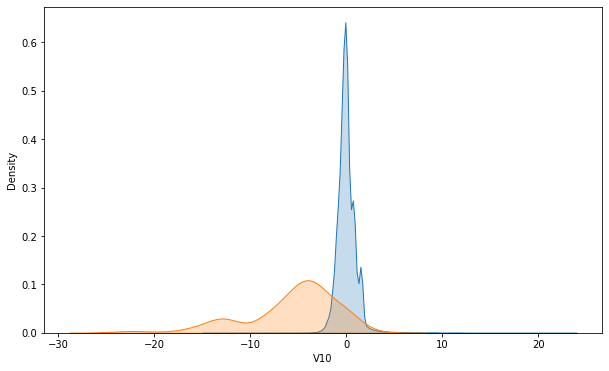

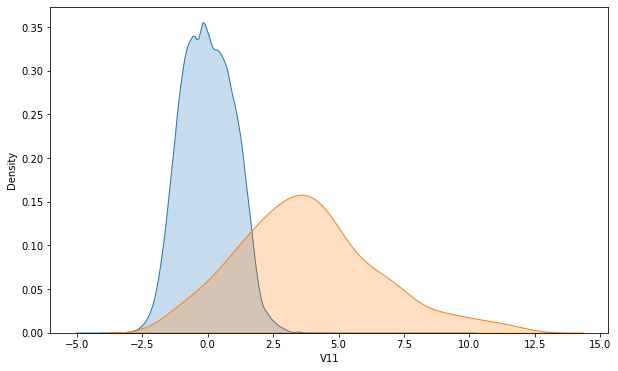

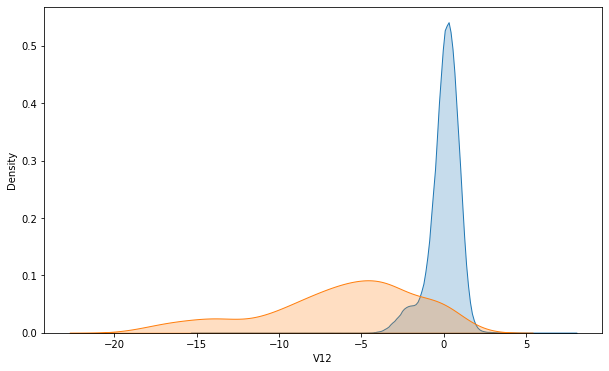

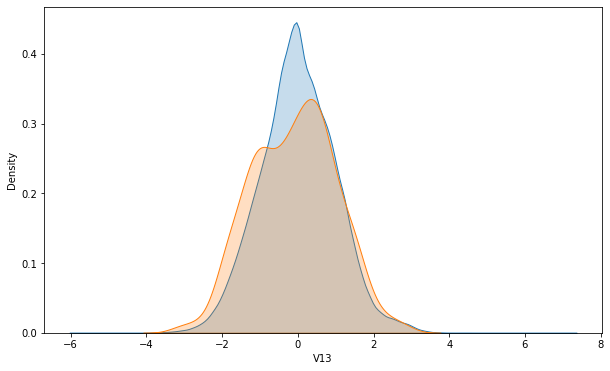

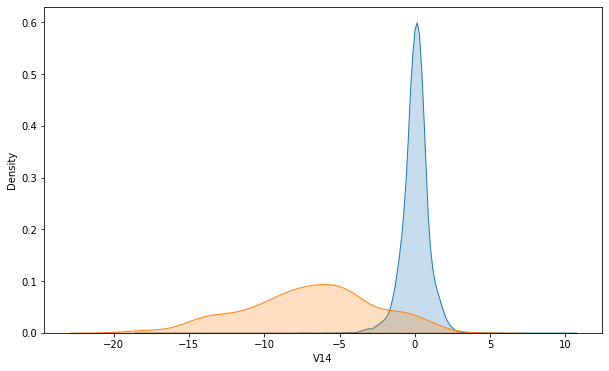

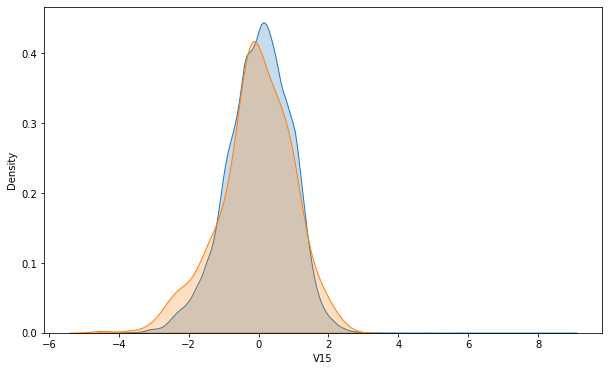

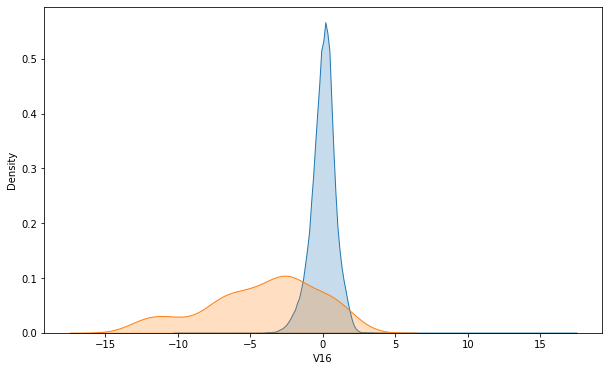

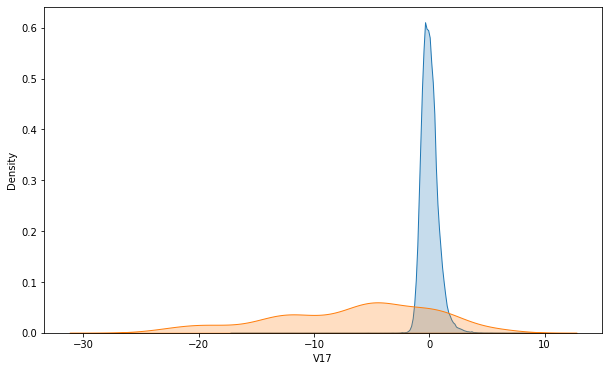

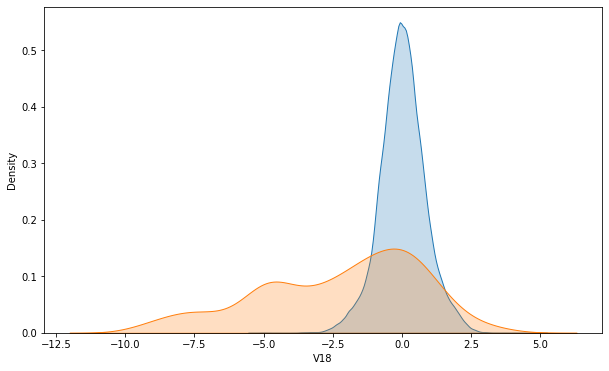

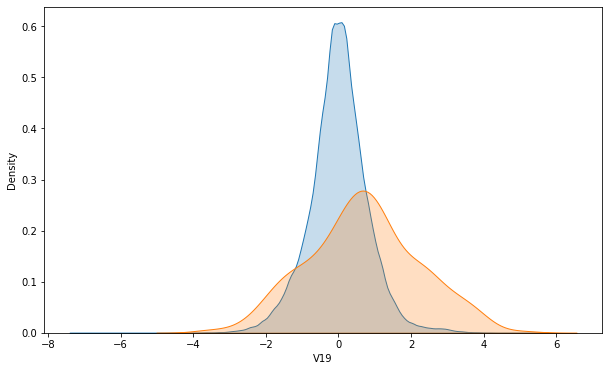

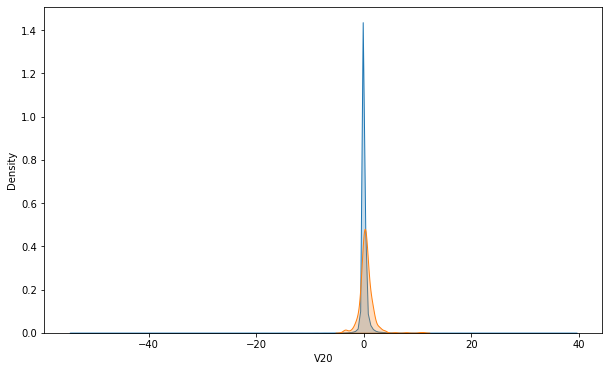

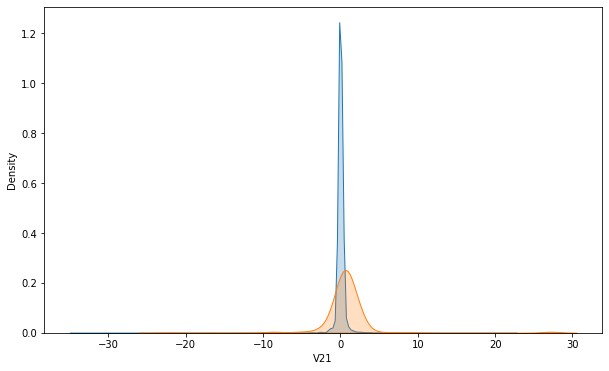

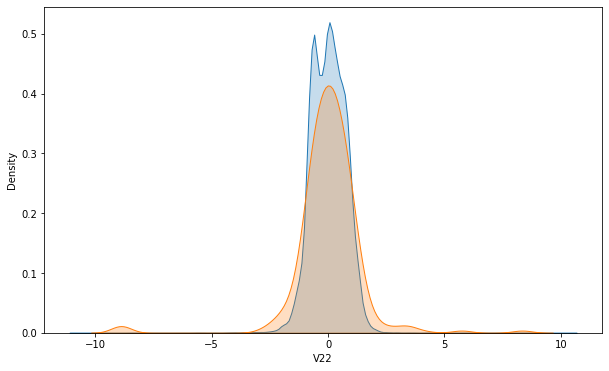

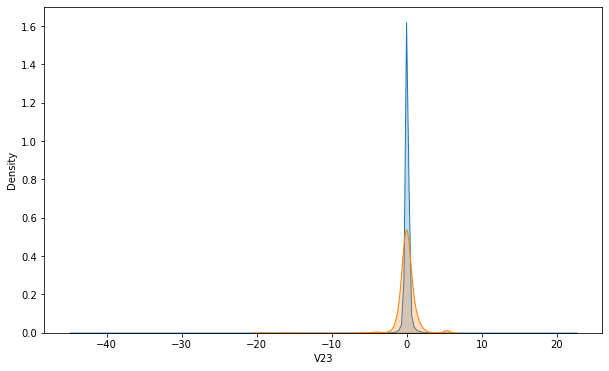

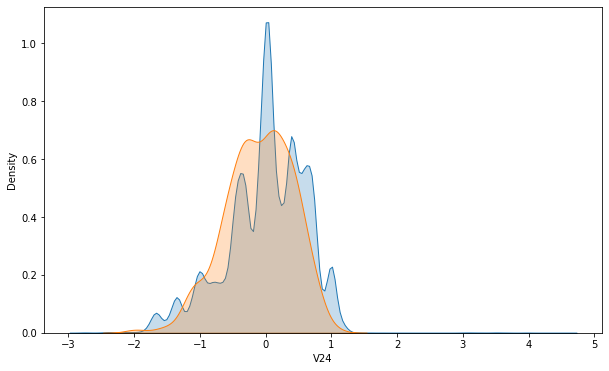

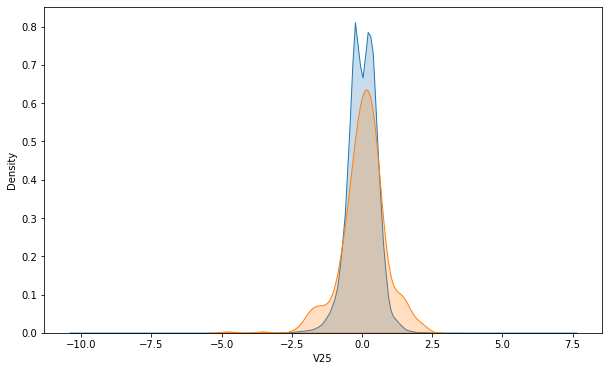

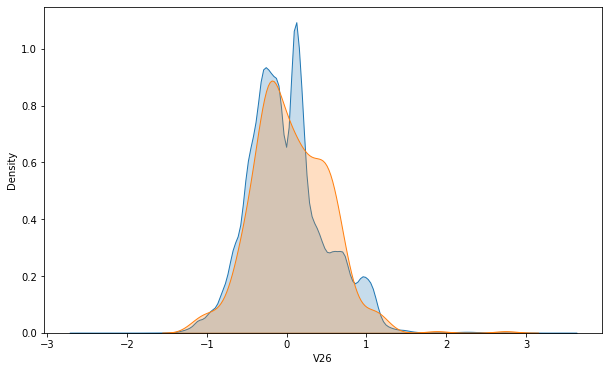

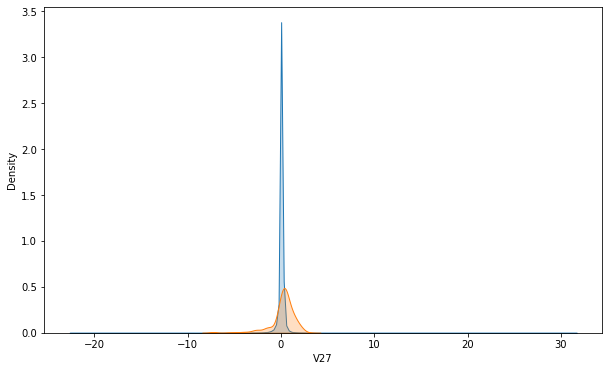

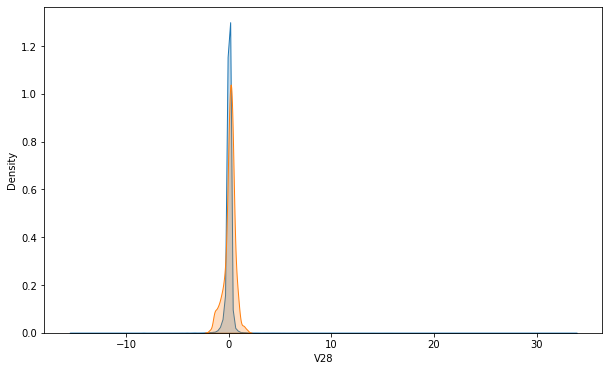

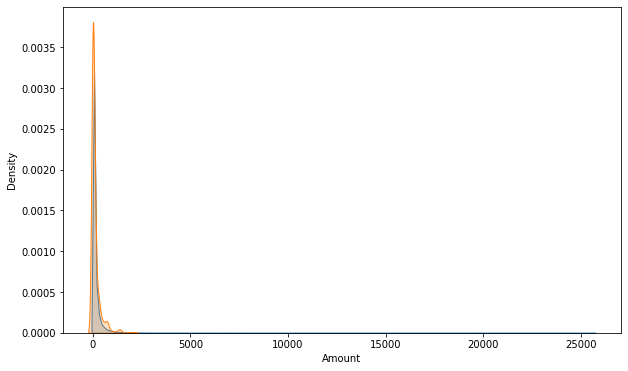

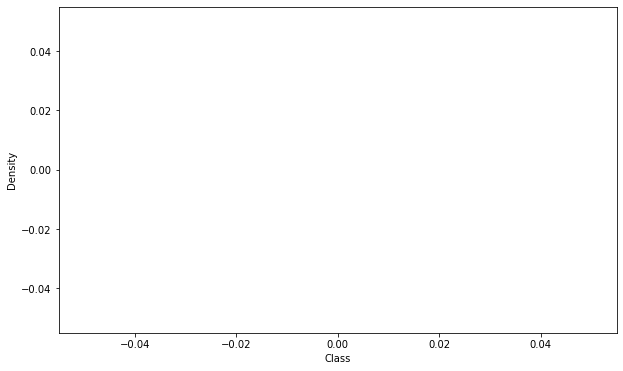

In [21]:
for variable in data_df.columns:
    plt.figure(figsize=(10,6))
    sns.kdeplot(Class0_df[variable], shade=True)
    sns.kdeplot(Class1_df[variable], shade=True)

### there are many variables have overlapping between class 1 and class 0
### hard to classify between class 1 and class 0

### Using outlier data

In [22]:
outlier_df = data_df[~idx]

Percentage of Class 0: 80.03 %
Percentage of Class 1: 19.97 %


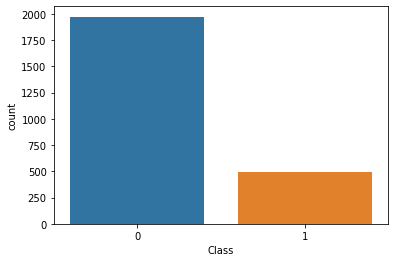

In [23]:
### class distributions
sns.countplot("Class",data=outlier_df)

print('Percentage of Class 0: {a} %'.format(a = round(len(outlier_df[outlier_df['Class'] == 0])/len(outlier_df)*100, 2)))
print('Percentage of Class 1: {a} %'.format(a = round(len(outlier_df[outlier_df['Class'] == 1])/len(outlier_df)*100, 2)))

In [24]:
Class0_df = outlier_df[outlier_df['Class'] == 0]
Class1_df = outlier_df[outlier_df['Class'] == 1]

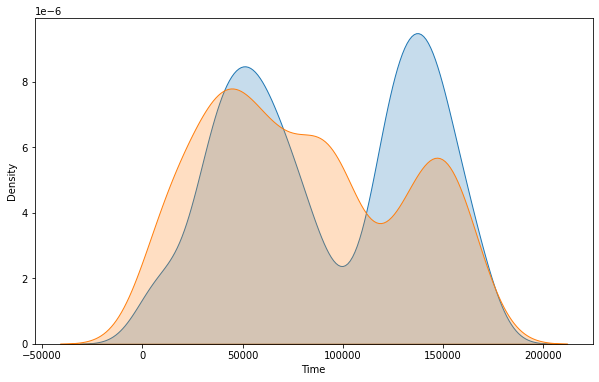

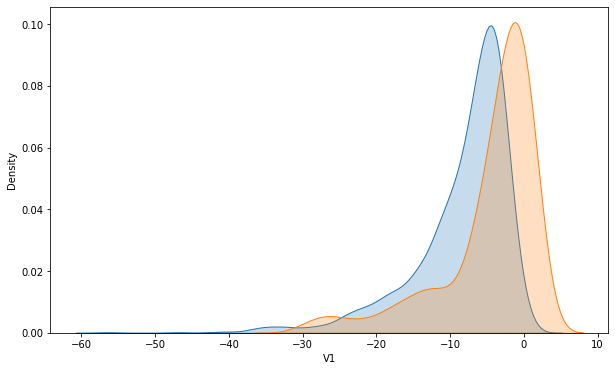

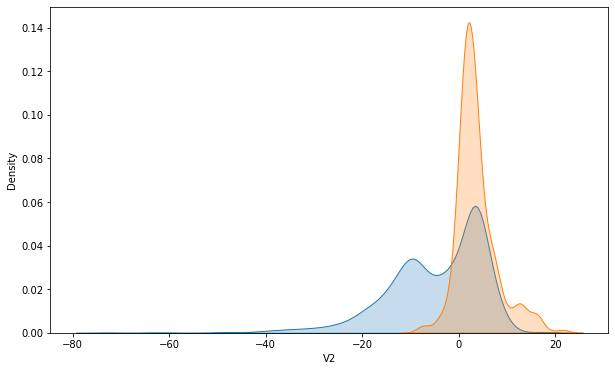

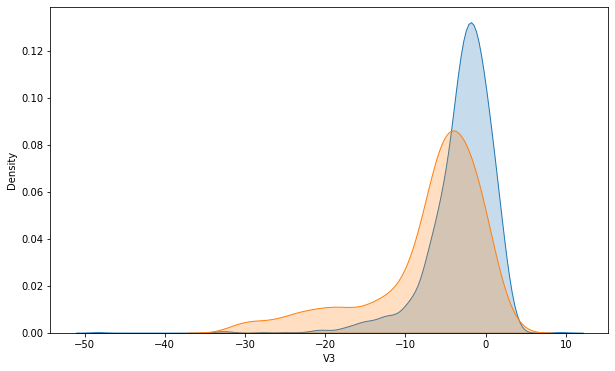

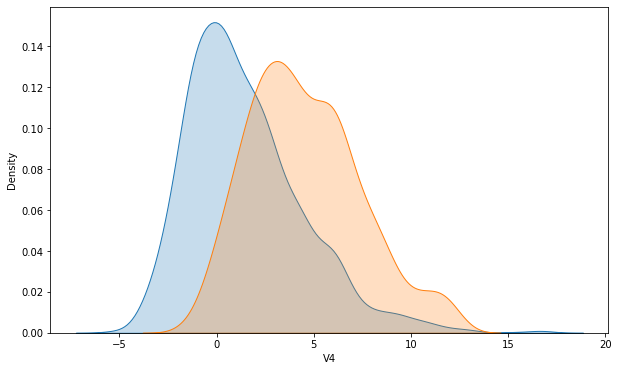

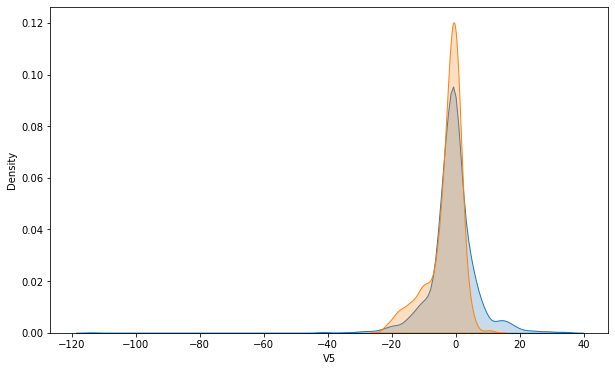

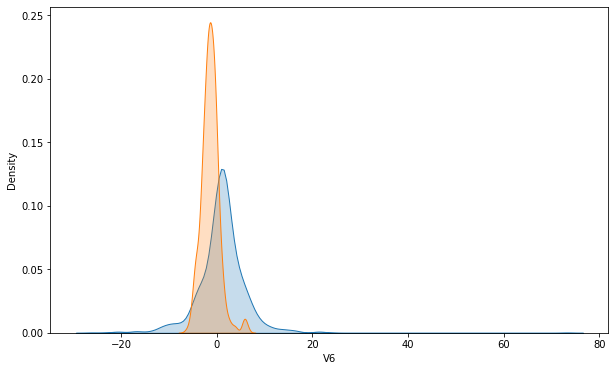

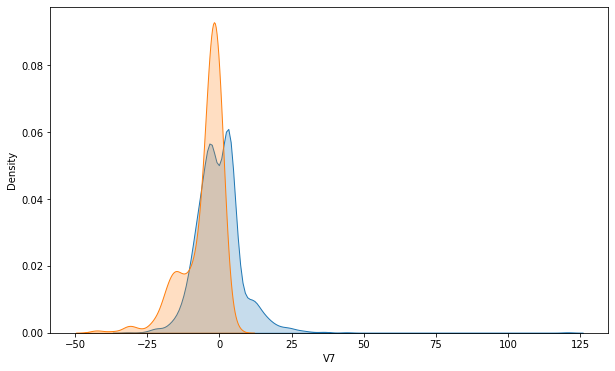

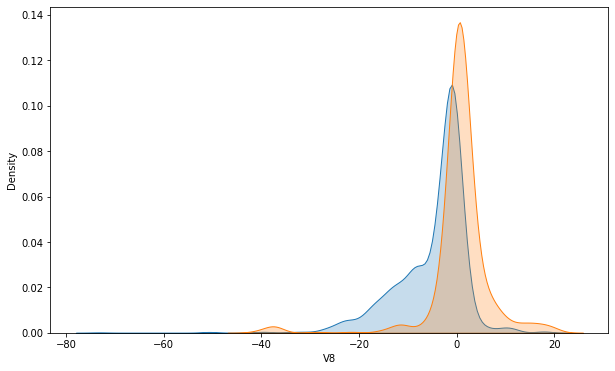

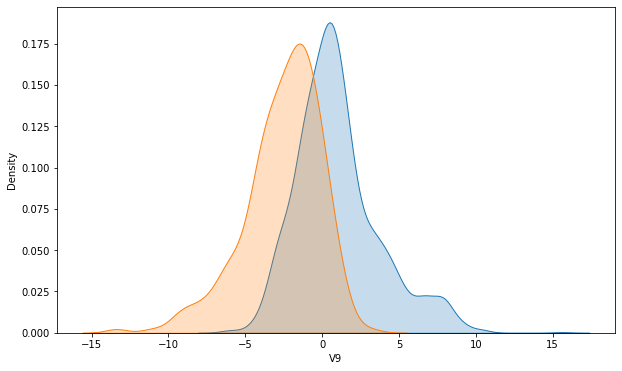

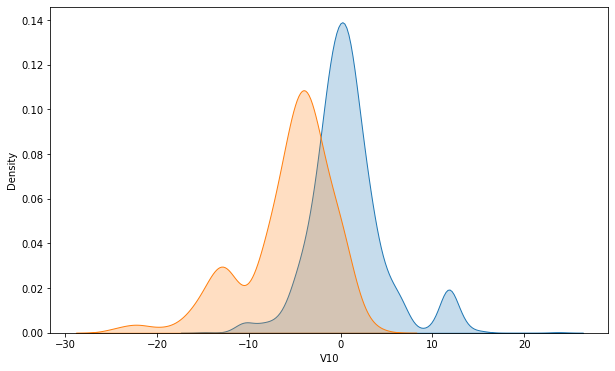

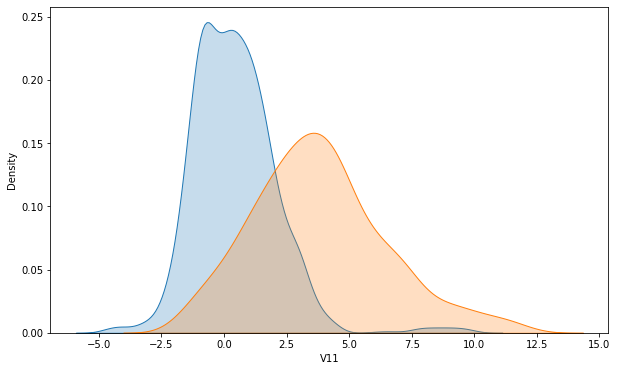

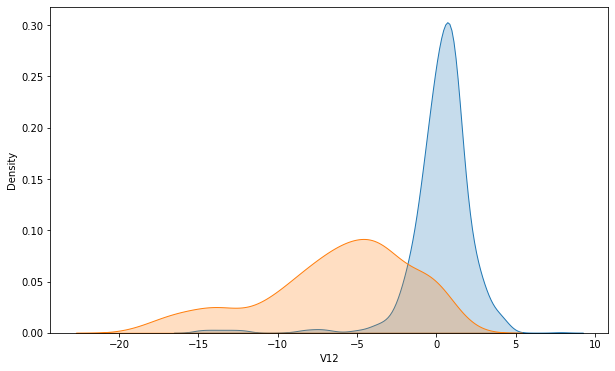

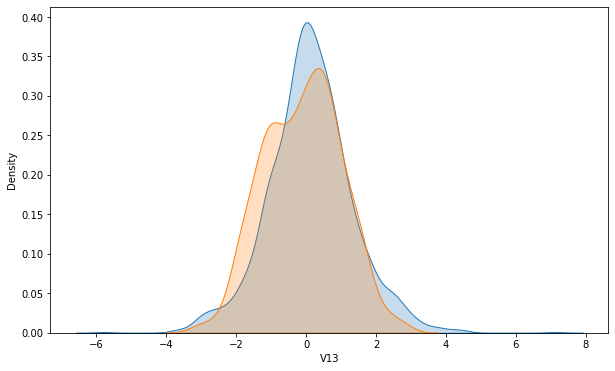

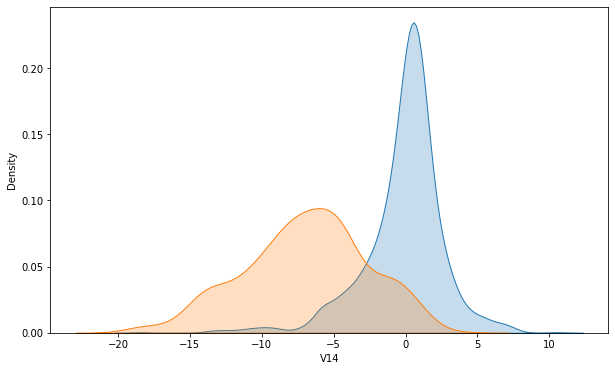

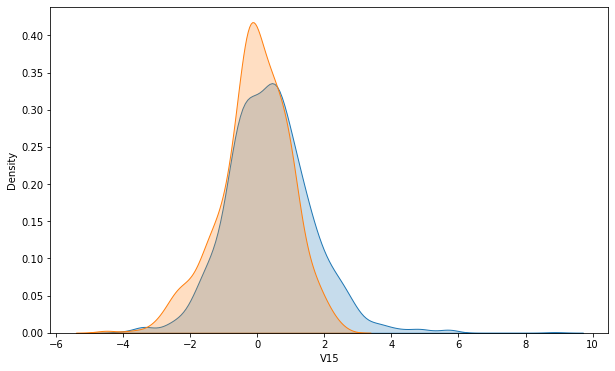

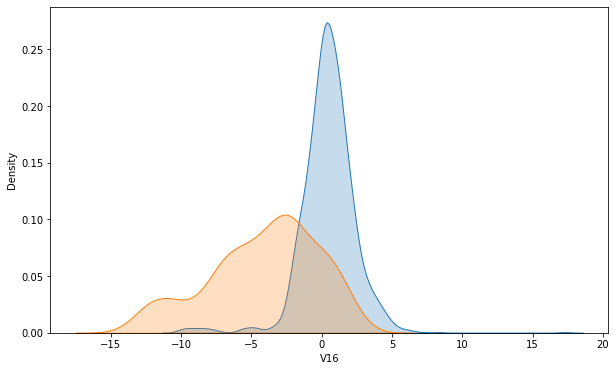

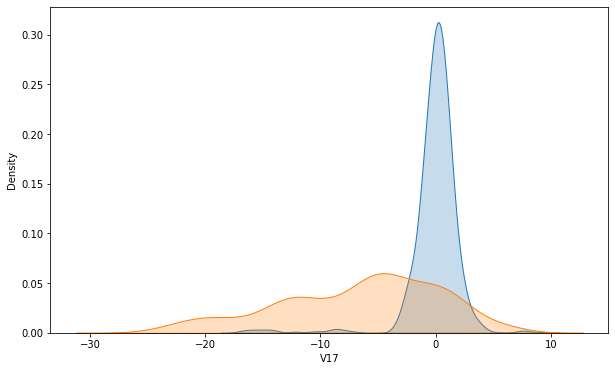

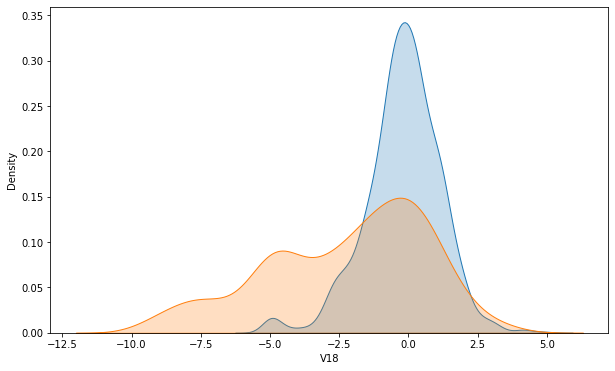

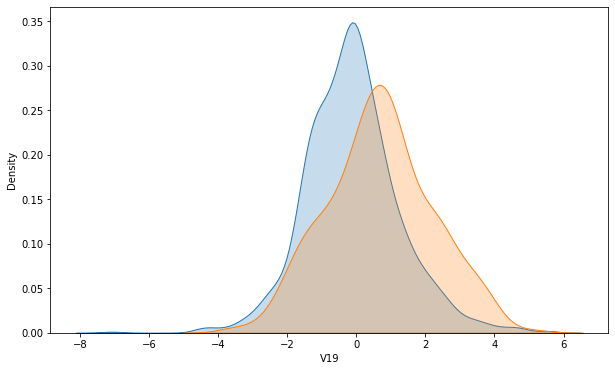

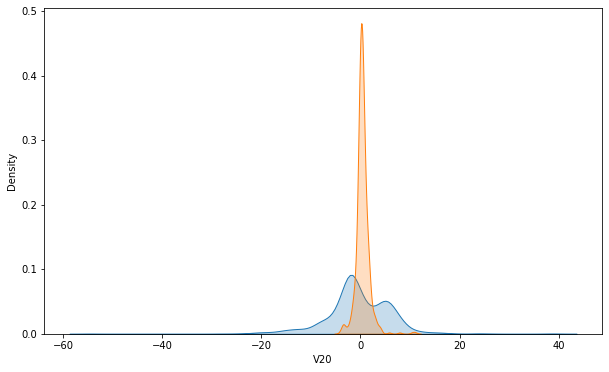

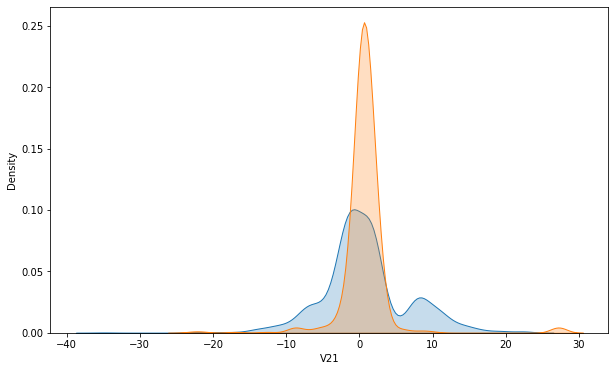

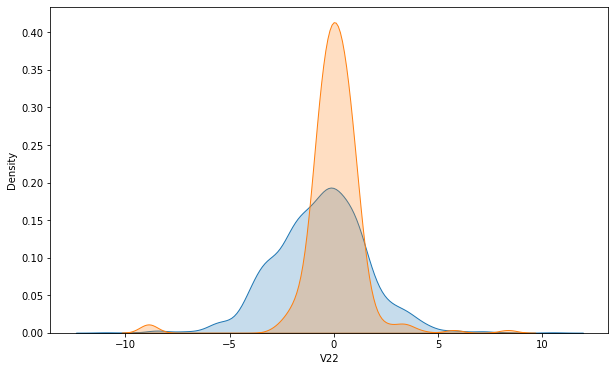

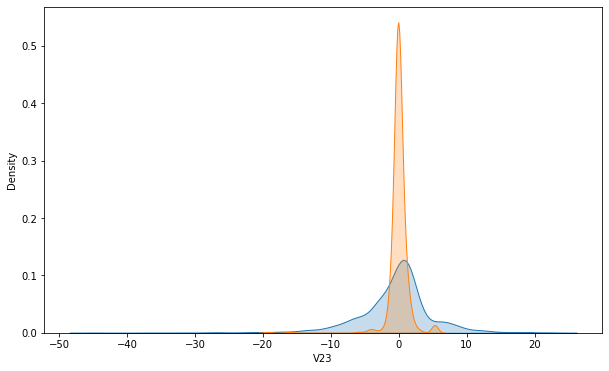

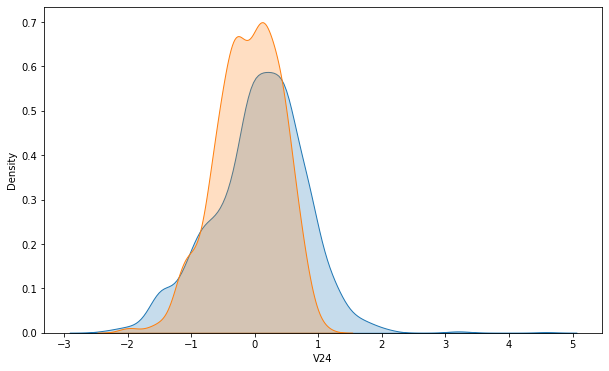

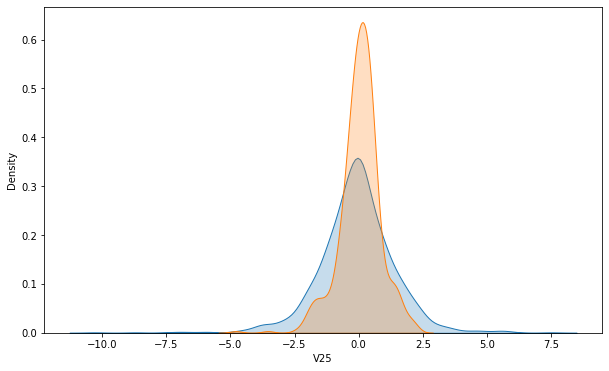

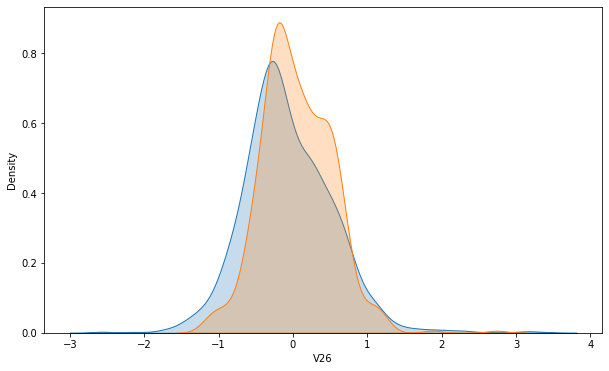

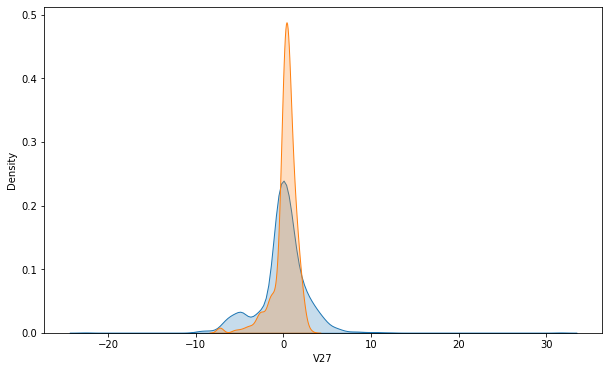

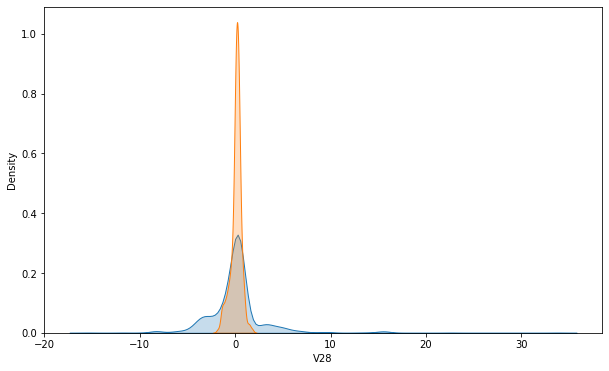

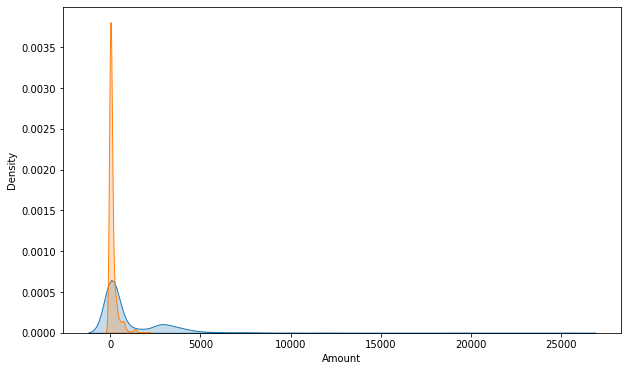

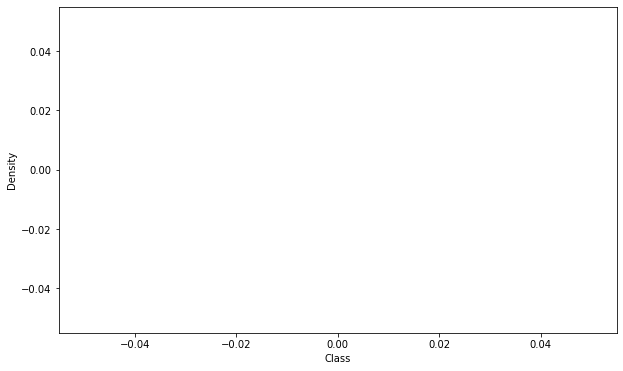

In [25]:
for variable in data_df.columns:
    plt.figure(figsize=(10,6))
    sns.kdeplot(Class0_df[variable], shade=True)
    sns.kdeplot(Class1_df[variable], shade=True)

### there are many variables have overlapping between class 1 and class 0
### hard to classify between class 1 and class 0

# Build classification model

In [26]:
def train_test_split_preprocessing(df):
    data_df
    features= df.loc[:,df.columns != "Class"]
    labels=df.loc[:,df.columns=="Class"]

    X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2, random_state=123)

    print("\nLen of X_train: {a}".format(a = len(X_train)))
    print("Len of X_test: {a}".format(a = len(X_test)))
    
    print("\nVariables: {a}".format(a=list(X_train.columns)))
    
    print("\nIn test label:")
    print(y_test["Class"].value_counts())
    return (X_train, X_test, y_train, y_test)

In [27]:
def model(model, X_train, X_test, y_train, y_test):
    clf = model
    clf.fit(X_train,y_train) #.values.ravel()
    pred=clf.predict(X_test)
    
    print("========== MODEL DETAILS ==========")
    print(clf, "\n")
    
    print("========== CONFUSION MATRIX ==========")
    confusion_matrix_df=pd.DataFrame(confusion_matrix(y_test,pred))
    confusion_matrix_df.columns = ['Predicted 0', 'Predicted 1']
    confusion_matrix_df = confusion_matrix_df.rename({0: 'Actual 0', 1: 'Actual 1'})
    print(confusion_matrix_df, "\n")

    print("========== CLASSIFICATION REPORT ==========")
    print(classification_report(y_test,pred), "\n")

    print("========== ROC CURVE ==========")
    AUC = round(roc_auc_score(y_test,pred),4)
    print("AUC: {a}".format(a = AUC))
    
    FP, TP, _ = roc_curve(y_test,pred,pos_label=1)

    plt.plot(FP,TP,label="data 1, auc="+str(AUC))
    plt.title("ROC Curve")
    plt.legend(loc=4)
    plt.show()
    
    return clf

In [29]:
data_df_normalised = StandardScaler().fit_transform(data_df.values.reshape(-1, 1))
data_df_normalised
# .head()

array([[-0.16285559],
       [-0.16292793],
       [-0.16285947],
       ...,
       [-0.16285487],
       [-0.15131182],
       [-0.16285559]])

## Baseline model

In [30]:
X_train, X_test, y_train, y_test = train_test_split_preprocessing(data_df.drop(['Time','Amount'], axis=1))


Len of X_train: 227845
Len of X_test: 56962

Variables: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

In test label:
0    56847
1      115
Name: Class, dtype: int64


========== MODEL DETAILS ==========
LogisticRegression() 

========== CONFUSION MATRIX ==========
          Predicted 0  Predicted 1
Actual 0        56833           14
Actual 1           46           69 

========== CLASSIFICATION REPORT ==========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.83      0.60      0.70       115

    accuracy                           1.00     56962
   macro avg       0.92      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962
 

========== ROC CURVE ==========
AUC: 0.7999


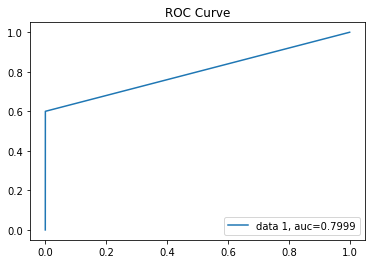

In [31]:
clf=LogisticRegression()

clf = model(clf, X_train, X_test, y_train, y_test)

### low precision means many false alarm
### low recall means unable to capture 1

In [32]:
feature_importance = pd.DataFrame({"Variable":X_train.columns, "Coefficient":clf.coef_[0]})
feature_importance

# A negative coefficient means that higher value of the corresponding feature pushes the classification more towards the negative class

,Variable,Coefficient
0,V1,0.037308
1,V2,-0.010863
2,V3,-0.046346
3,V4,0.689908
4,V5,0.070466
5,V6,-0.070643
6,V7,0.004649
7,V8,-0.208014
8,V9,-0.207315
9,V10,-0.591513


## Undersampling

In [35]:
### ratio is fraction of Class1 in the final undersampled dataframe
def undersampling(df, ratio):
    Class0_df = df[df['Class'] == 0]
    Class1_df = df[df['Class'] == 1]
    
    gap = int(len(Class1_df)/ratio)-len(Class1_df)
    Class0_df_new = resample(Class0_df,
                          replace=True,
                          n_samples=gap,
                          random_state=123)
    
    df_undersampled = pd.concat([Class0_df_new, Class1_df]).reset_index(drop=True)
    
    print('Percentage of Class 0: {a} %'.format(a = round(len(df_undersampled[df_undersampled['Class'] == 0])/len(df_undersampled)*100, 2)))
    print('Percentage of Class 1: {a} %'.format(a = round(len(df_undersampled[df_undersampled['Class'] == 1])/len(df_undersampled)*100, 2)))
    
    return(df_undersampled)

In [36]:
data_df_undersampled = undersampling(data_df, 0.50)

X_train, X_test, y_train, y_test = train_test_split_preprocessing(data_df_undersampled.drop(['Time','Amount'], axis=1))

Percentage of Class 0: 50.0 %
Percentage of Class 1: 50.0 %

Len of X_train: 787
Len of X_test: 197

Variables: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

In test label:
0    109
1     88
Name: Class, dtype: int64


========== MODEL DETAILS ==========
LogisticRegression() 

========== CONFUSION MATRIX ==========
          Predicted 0  Predicted 1
Actual 0          106            3
Actual 1            7           81 

========== CLASSIFICATION REPORT ==========
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       109
           1       0.96      0.92      0.94        88

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197
 

========== ROC CURVE ==========
AUC: 0.9465


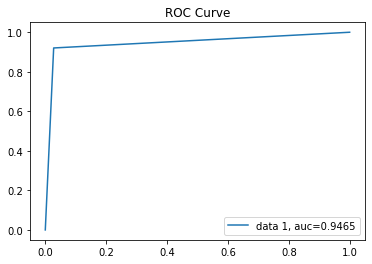

In [37]:
clf=LogisticRegression()
clf = model(clf, X_train, X_test, y_train, y_test)

### low precision means many false alarm
### low recall means unable to capture 1

In [38]:
feature_importance = pd.DataFrame({"Variable":X_train.columns, "Coefficient":clf.coef_[0]})
feature_importance.sort_values(by=["Coefficient"], ascending = False)

# A negative coefficient means that higher value of the corresponding feature pushes the classification more towards the negative class

,Variable,Coefficient
3,V4,0.910004
26,V27,0.793958
10,V11,0.476181
19,V20,0.360778
6,V7,0.310407
21,V22,0.245832
14,V15,0.145960
24,V25,0.054492
0,V1,0.031189
4,V5,0.031125


### Train-test Split before Undersampling

In [39]:
X_train, X_test, y_train, y_test = train_test_split_preprocessing(data_df.drop(['Time','Amount'], axis=1))


Len of X_train: 227845
Len of X_test: 56962

Variables: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

In test label:
0    56847
1      115
Name: Class, dtype: int64


In [40]:
### merge X_train, y_train before oversampling
data_df_train = pd.concat([X_train, y_train], axis=1)
data_df_undersampled = undersampling(data_df_train, 0.50)

### Split into X_train, y_train
X_train = data_df_undersampled.drop(['Class'], axis=1)
y_train = data_df_undersampled[['Class']]

Percentage of Class 0: 50.0 %
Percentage of Class 1: 50.0 %


========== MODEL DETAILS ==========
LogisticRegression() 

========== CONFUSION MATRIX ==========
          Predicted 0  Predicted 1
Actual 0        54813         2034
Actual 1            8          107 

========== CLASSIFICATION REPORT ==========
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56847
           1       0.05      0.93      0.09       115

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.54     56962
weighted avg       1.00      0.96      0.98     56962
 

========== ROC CURVE ==========
AUC: 0.9473


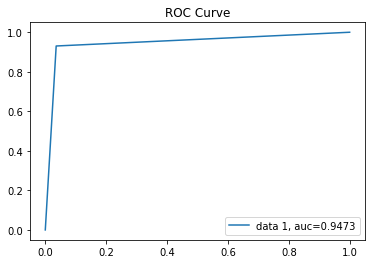

In [41]:
clf = LogisticRegression()
clf = model(clf, X_train, X_test, y_train, y_test)

### low precision means many false alarm
### low recall means unable to capture 1

========== MODEL DETAILS ==========
RandomForestClassifier() 

========== CONFUSION MATRIX ==========
          Predicted 0  Predicted 1
Actual 0        54994         1853
Actual 1            9          106 

========== CLASSIFICATION REPORT ==========
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56847
           1       0.05      0.92      0.10       115

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962
 

========== ROC CURVE ==========
AUC: 0.9446


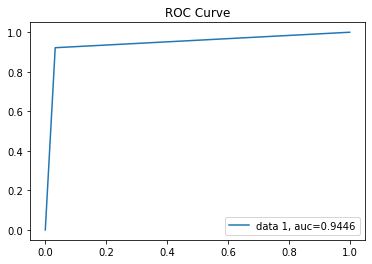

In [42]:
clf = RandomForestClassifier()
clf = model(clf, X_train, X_test, y_train, y_test)

### low precision means many false alarm
### low recall means unable to capture 1

========== MODEL DETAILS ==========
GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9, 10, 11, 12],
                         'n_estimators': [320, 330, 340], 'random_state': [0]}) 

========== CONFUSION MATRIX ==========
          Predicted 0  Predicted 1
Actual 0        55124         1723
Actual 1            9          106 

========== CLASSIFICATION REPORT ==========
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56847
           1       0.06      0.92      0.11       115

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962
 

========== ROC CURVE ==========
AUC: 0.9457


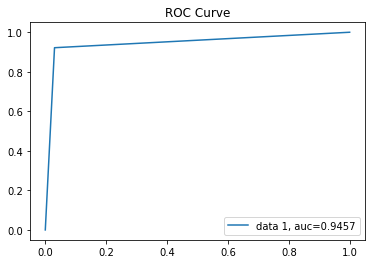

In [43]:
clf = RandomForestClassifier()

param_grid = {
    'n_estimators'      : [320,330,340],
    'max_depth'         : [8, 9, 10, 11, 12],
    'random_state'      : [0]
    #'max_features': ['auto'],
    #'criterion' :['gini']
}

clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)

clf = model(clf, X_train, X_test, y_train, y_test)


## Oversampling

In [44]:
### ratio is fraction of Class1 in the final undersampled dataframe
def oversampling(df, ratio):
    Class0_df = df[df['Class'] == 0]
    Class1_df = df[df['Class'] == 1]
    
    gap = int(len(Class0_df)/ratio)-len(Class0_df)
     
    Class1_df_new = resample(Class1_df,
                          replace=True,
                          n_samples=gap,
                          random_state=123)
    
    df_oversampled = pd.concat([Class0_df, Class1_df_new]) 
    
    print('Percentage of Class 0: {a} %'.format(a = round(len(df_oversampled[df_oversampled['Class'] == 0])/len(df_oversampled)*100, 2)))
    print('Percentage of Class 1: {a} %'.format(a = round(len(df_oversampled[df_oversampled['Class'] == 1])/len(df_oversampled)*100, 2)))
    
    return(df_oversampled)

In [45]:
data_df_oversampled = oversampling(data_df, 0.50)

X_train, X_test, y_train, y_test = train_test_split_preprocessing(data_df_oversampled.drop(['Time','Amount'], axis=1))

Percentage of Class 0: 50.0 %
Percentage of Class 1: 50.0 %

Len of X_train: 454904
Len of X_test: 113726

Variables: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

In test label:
1    56958
0    56768
Name: Class, dtype: int64


========== MODEL DETAILS ==========
LogisticRegression() 

========== CONFUSION MATRIX ==========
          Predicted 0  Predicted 1
Actual 0        55525         1243
Actual 1         4580        52378 

========== CLASSIFICATION REPORT ==========
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56768
           1       0.98      0.92      0.95     56958

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726
 

========== ROC CURVE ==========
AUC: 0.9488


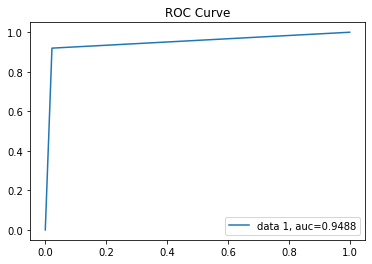

In [46]:
clf = LogisticRegression()
clf = model(clf, X_train, X_test, y_train, y_test)

### low precision means many false alarm
### low recall means unable to capture 1

In [47]:
feature_importance = pd.DataFrame({"Variable":X_train.columns, "Coefficient":clf.coef_[0]})
feature_importance.sort_values(by=["Coefficient"], ascending = False)

# A negative coefficient means that higher value of the corresponding feature pushes the classification more towards the negative class

,Variable,Coefficient
3,V4,0.944753
10,V11,0.537257
27,V28,0.513686
21,V22,0.456081
26,V27,0.395052
0,V1,0.277826
20,V21,0.245037
6,V7,0.152832
4,V5,0.132145
18,V19,0.128226


========== MODEL DETAILS ==========
RandomForestClassifier() 

========== CONFUSION MATRIX ==========
          Predicted 0  Predicted 1
Actual 0        56758           10
Actual 1            0        56958 

========== CLASSIFICATION REPORT ==========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56768
           1       1.00      1.00      1.00     56958

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726
 

========== ROC CURVE ==========
AUC: 0.9999


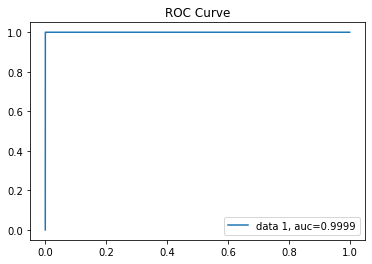

In [48]:
clf = RandomForestClassifier()
clf = model(clf, X_train, X_test, y_train, y_test)

### low precision means many false alarm
### low recall means unable to capture 1

### Train-test split first then oversampling

In [49]:
X_train, X_test, y_train, y_test = train_test_split_preprocessing(data_df.drop(['Time','Amount'], axis=1))


Len of X_train: 227845
Len of X_test: 56962

Variables: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

In test label:
0    56847
1      115
Name: Class, dtype: int64


In [50]:
### merge X_train, y_train before oversampling
data_df_train = pd.concat([X_train, y_train], axis=1)
data_df_oversampled = oversampling(data_df_train, 0.50)

### Split into X_train, y_train
X_train = data_df_oversampled.drop(['Class'], axis=1)
y_train = data_df_oversampled[['Class']]

Percentage of Class 0: 50.0 %
Percentage of Class 1: 50.0 %


========== MODEL DETAILS ==========
LogisticRegression() 

========== CONFUSION MATRIX ==========
          Predicted 0  Predicted 1
Actual 0        55369         1478
Actual 1            8          107 

========== CLASSIFICATION REPORT ==========
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56847
           1       0.07      0.93      0.13       115

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.97      0.99     56962
 

========== ROC CURVE ==========
AUC: 0.9522


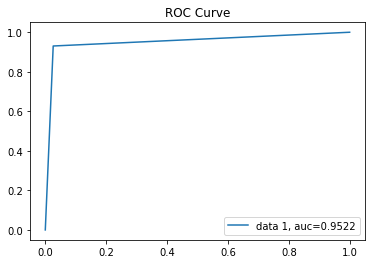

In [51]:
clf = LogisticRegression()
clf = model(clf, X_train, X_test, y_train, y_test)

### low precision means many false alarm
### low recall means unable to capture 1

========== MODEL DETAILS ==========
RandomForestClassifier() 

========== CONFUSION MATRIX ==========
          Predicted 0  Predicted 1
Actual 0        56843            4
Actual 1           22           93 

========== CLASSIFICATION REPORT ==========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.96      0.81      0.88       115

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962
 

========== ROC CURVE ==========
AUC: 0.9043


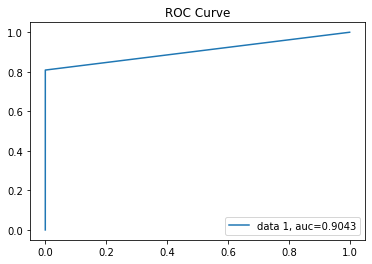

In [52]:
clf = RandomForestClassifier()
clf = model(clf, X_train, X_test, y_train, y_test)

### low precision means many false alarm
### low recall means unable to capture 1

## SMOTE

In [56]:
def SMOTE_oversampling(X_train, y_train):
    sm = SMOTE(sampling_strategy='minority', random_state=123)
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    X_train_sm= pd.DataFrame(data=X_train_sm,columns=X_train.columns)
    y_train_sm = pd.DataFrame(data=y_train_sm,columns=y_train.columns)
    
    print("Before SMOTE oversampling: ")
    print(y_train["Class"].value_counts())
    
    print("\nAfter SMOTE oversampling: ")
    print(y_train_sm["Class"].value_counts())
    
    return(X_train_sm,y_train_sm)

### Preprocessing

In [57]:
X_train, X_test, y_train, y_test = train_test_split_preprocessing(data_df.drop(['Time','Amount'], axis=1))


Len of X_train: 227845
Len of X_test: 56962

Variables: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

In test label:
0    56847
1      115
Name: Class, dtype: int64


In [58]:
X_train_sm,y_train_sm = SMOTE_oversampling(X_train, y_train)

Before SMOTE oversampling: 
0    227468
1       377
Name: Class, dtype: int64

After SMOTE oversampling: 
0    227468
1    227468
Name: Class, dtype: int64


### Logistic Regression

========== MODEL DETAILS ==========
LogisticRegression() 

========== CONFUSION MATRIX ==========
          Predicted 0  Predicted 1
Actual 0        55268         1579
Actual 1            8          107 

========== CLASSIFICATION REPORT ==========
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56847
           1       0.06      0.93      0.12       115

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962
 

========== ROC CURVE ==========
AUC: 0.9513


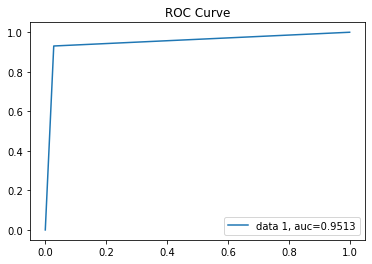

In [59]:
clf = LogisticRegression()
clf = model(clf, X_train_sm, X_test, y_train_sm, y_test)

### low precision means many false alarm
### low recall means unable to capture 1

### Logistic Regression GridSearch

========== MODEL DETAILS ==========
GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']}) 

========== CONFUSION MATRIX ==========
          Predicted 0  Predicted 1
Actual 0        55268         1579
Actual 1            8          107 

========== CLASSIFICATION REPORT ==========
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56847
           1       0.06      0.93      0.12       115

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962
 

========== ROC CURVE ==========
AUC: 0.9513


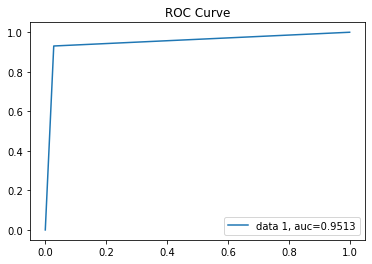

In [60]:
clf = LogisticRegression()

param_grid = { 
    'penalty': ['l1','l2'],
    "C": np.logspace(-3,3,7)
}

clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)

clf = model(clf, X_train_sm, X_test, y_train_sm, y_test)

### low precision means many false alarm
### low recall means unable to capture 1

### Random Forest

========== MODEL DETAILS ==========
RandomForestClassifier() 

========== CONFUSION MATRIX ==========
          Predicted 0  Predicted 1
Actual 0        56832           15
Actual 1           18           97 

========== CLASSIFICATION REPORT ==========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.87      0.84      0.85       115

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962
 

========== ROC CURVE ==========
AUC: 0.9216


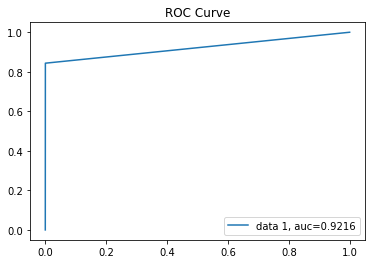

In [61]:
clf = RandomForestClassifier()
clf = model(clf, X_train_sm, X_test, y_train_sm, y_test)

### low precision means many false alarm
### low recall means unable to capture 1